Fase 1: Preparación y Exploración Inicial
Revisión de los datos proporcionados

Inspecciona el archivo de datos para familiarizarte con las columnas, formato y estructura.
Carga los datos en un Jupyter Notebook utilizando Pandas.
Haz un resumen básico de las columnas (tipos de datos, valores únicos, tamaños, etc.).

Análisis Exploratorio de Datos (EDA)

Calcula estadísticas descriptivas (media, mediana, desviación estándar).
Crea visualizaciones iniciales: histogramas, gráficos de barras y boxplots para identificar patrones y posibles outliers.
Identifica distribuciones temporales si hay columnas de fechas (e.g., cuándo se realizaron adelantos o pagos).
Análisis de la Calidad de Datos 

Identifica valores faltantes, duplicados e inconsistencias.
Documenta los problemas encontrados y las estrategias de limpieza necesarias.


Fase 2: Limpieza y Preprocesamiento de los Datos
Limpieza de datos

Corrige o elimina datos faltantes, duplicados y valores fuera de rango.
Estandariza formatos de columnas clave, como fechas o categorías.
Creación de cohortes

Define cohortes basadas en la fecha del primer adelanto de efectivo. Agrúpalas según el año/mes/trimestre.


Fase 3: Análisis de Métricas
Cálculo de métricas iniciales

Frecuencia de uso del servicio: Calcula el promedio de uso por usuario y cohorte a lo largo del tiempo.
Tasa de incidentes: Determina qué porcentaje de transacciones presentan problemas por cohorte.
Ingresos generados: Agrega los ingresos por cohorte y analiza la evolución.
Métricas acumuladas: Define y calcula métricas adicionales (como ingresos acumulados por usuario).
Visualización de métricas

Crea gráficos para mostrar la evolución temporal de cada métrica en cada cohorte.
Utiliza gráficos de líneas, heatmaps o diagramas de dispersión según sea necesario.


Fase 4: Modelado Avanzado
Modelos de regresión

Diseña modelos para predecir métricas clave, como ingresos futuros o tasas de uso.
Realiza la búsqueda de hiperparámetros e interpreta los resultados.
Crea visualizaciones, como gráficos de residuos y comparaciones entre predicciones y valores reales.
Modelos de clasificación

Segmenta usuarios según patrones de comportamiento (e.g., usuarios recurrentes vs. esporádicos).
Entrena modelos para clasificar usuarios con base en métricas relevantes.


Fase 5: Documentación y Presentación
Informe del EDA y Calidad de Datos

Resume los hallazgos y acciones tomadas durante el EDA y la limpieza en formato markdown.
Informe de Insights y Modelos

Documenta los insights clave obtenidos de las métricas y el análisis de cohortes.
Explica los modelos creados, sus parámetros y la interpretación de los resultados.
Repositorio GitHub

Organiza el código, datos y documentación en un repositorio estructurado.
Crea un README con los puntos clave del análisis.
Presentación ejecutiva

Diseña una presentación corta y clara con los insights y propuestas más relevantes para los stakeholders.

In [2]:
#1-
import pandas as pd

# archivo cashrequest.csv
ruta_archivo = './cashrequest.csv'
CR = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(CR.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(CR.describe())
# Lista de columnas del DataFrame
print(CR.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [3]:
# archivo extractfees.csv
ruta_archivo = './extractfees.csv'
fees = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(fees.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(fees.describe())
# Lista de columnas del DataFrame
print(fees.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB
None
                 id  cash_request_id  total_amount
count  21061.000000     21057.000000  21061.000000
mean   10645.355111     16318.4

NameError: name 'datos' is not defined

###Tamaño del dataset cashrequest.csv:

-Filas: 23,970
-Columnas: 16
-Datos nulos:

##Varias columnas tienen datos incompletos:

-user_id: faltan datos en 2,103 registros. ( 5   user_id  ~21867~ non-null  float64)

-moderated_at, cash_request_received_date, money_back_date, send_at: tienen una cantidad significativa de valores nulos.

-deleted_account_id, recovery_status, reco_creation, reco_last_update: contienen una mayoría de valores nulos.


##Tipos de datos:


-Fechas: Varias columnas parecen contener timestamps (created_at, updated_at, reimbursement_date, etc.), pero están en formato object y requerirán conversión a datetime para su análisis.

-Categóricos: status, transfer_type, recovery_status son columnas que probablemente representen categorías.

-Numéricos: amount, id, user_id, y posiblemente deleted_account_id.
##Columnas relevantes:

-Columnas clave para cohortes: created_at (fecha de inicio del servicio).

-Variables de análisis financiero: amount, reimbursement_date, money_back_date.

-Variables de estado del servicio: status, recovery_status, transfer_type.


NameError: name 'datos' is not defined

NameError: name 'datos' is not defined

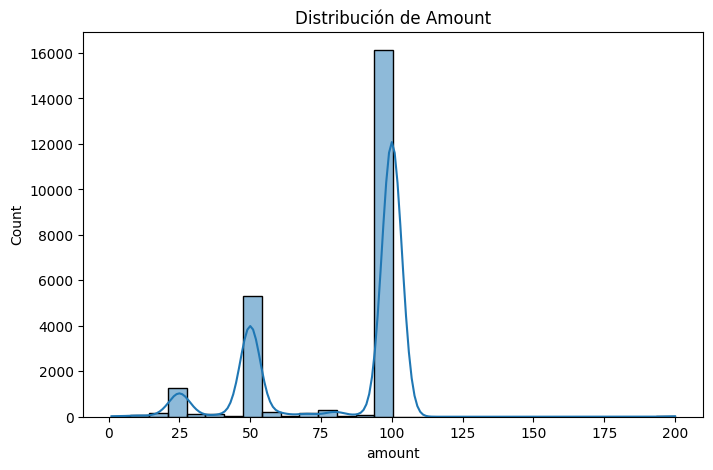

NameError: name 'datos' is not defined

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de montos
plt.figure(figsize=(8, 5))
sns.histplot(CR['amount'], bins=30, kde=True)
plt.title('Distribución de Amount')
plt.show()

# Conteo de categorías en 'status'
print(datos['status'].value_counts())
# Comprobación del rango de fechas
print(datos['created_at'].min(), datos['created_at'].max())


In [8]:
CR.info()
CR['status'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

array(['rejected', 'money_back', 'canceled', 'active',
       'direct_debit_rejected', 'transaction_declined',
       'direct_debit_sent'], dtype=object)

El database cash request deberia tener una columna de 'reason' Filled only if the CR was manually reviewed and rejected. That's the rejection's reason displayed in-app.

Pero no parece existir

En status no aparecen los valores: 'approved', 'money_sent', 'pending', 'waiting_user_confirmation','waiting reimbursement', 'active'


cash_request_debited_date no aparece 


In [9]:
rejected=CR[CR['status']=='rejected'].reset_index()

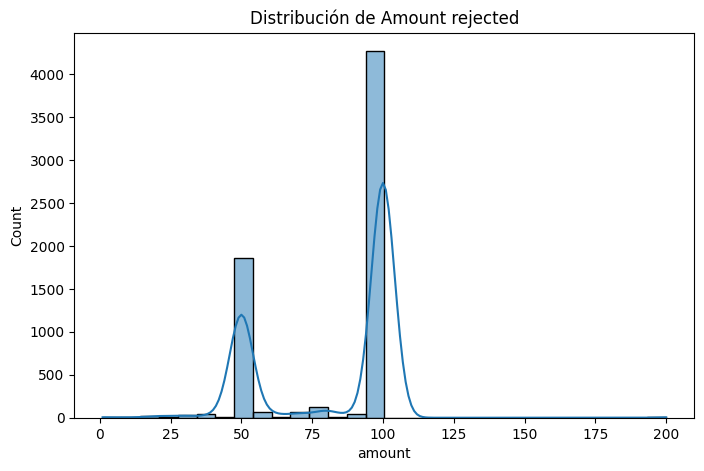

status
rejected    6568
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de montos
plt.figure(figsize=(8, 5))
sns.histplot(rejected['amount'], bins=30, kde=True)
plt.title('Distribución de Amount rejected')
plt.show()

# Conteo de categorías en 'status'
print(rejected['status'].value_counts())


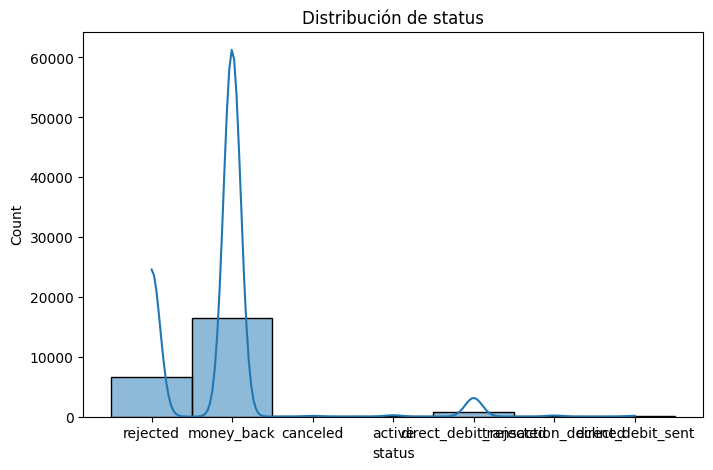

In [22]:


plt.figure(figsize=(8, 5))
sns.histplot(CR['status'], bins=30, kde=True)
plt.title('Distribución de status')
plt.show()

In [11]:
fees.info()
fees['type'].unique()
fees['status'].unique()
pd.concat([fees['id'], fees['cash_request_id']], ignore_index=True, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


,0,1
0,6537,14941.0
1,6961,11714.0
2,16296,23371.0
3,20775,26772.0
4,11242,19350.0
...,...,...
21056,12372,20262.0
21057,20768,26764.0
21058,18779,25331.0
21059,16542,23628.0


Parece que los movimientos mas interesantes son los de retirada de 100 y 50. Vamos a intentar calcular la probabilidad de que una transferencia se rechace en funcion del monto y si es instantanea o regular.

# 100

In [32]:
df_100=CR[CR['amount']==100.0].reset_index()

reject_inst=df_100[(df_100['transfer_type']=='instant') & (df_100['status']=='rejected')].count().reset_index()
P_reject_inst=reject_inst['index'].max()/df_100['index'].max()

reject_reg=df_100[(df_100['transfer_type']=='regular') & (df_100['status']=='rejected')].count().reset_index()
P_reject_reg=reject_reg['index'].max()/df_100['index'].max()

accept_inst=df_100[(df_100['transfer_type']=='instant') & (df_100['status']=='money_back')].count().reset_index()
P_accept_inst=accept_inst['index'].max()/df_100['index'].max()

accept_reg=df_100[(df_100['transfer_type']=='regular') & (df_100['status']=='money_back')].count().reset_index()
P_accept_reg=accept_reg['index'].max()/df_100['index'].max()



TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

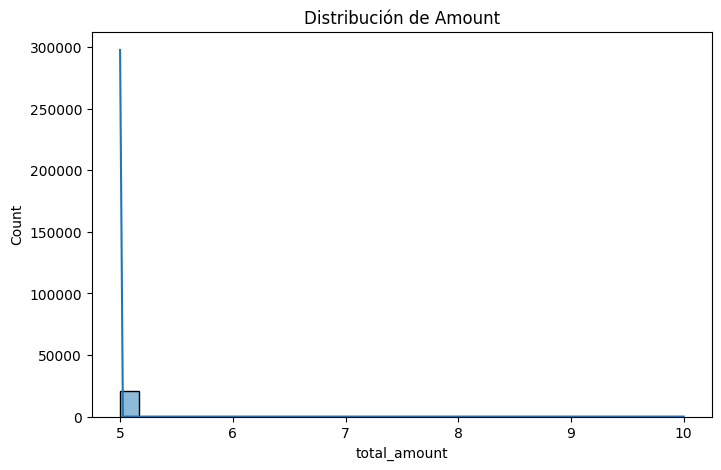

total_amount
5.0     21060
10.0        1
Name: count, dtype: int64


In [13]:
# Histograma de montos
plt.figure(figsize=(8, 5))
sns.histplot(fees['total_amount'], bins=30, kde=True)
plt.title('Distribución de Amount')
plt.show()

# Conteo de categorías en 'status'
print(fees['total_amount'].value_counts())


In [5]:
deleted_accounts=CR.dropna(subset=['deleted_account_id']).reset_index()

deleted_accounts_unique=deleted_accounts['deleted_account_id'].unique()

deleted_accounts[deleted_accounts['deleted_account_id'].isin(deleted_accounts_unique)]

for valor in deleted_accounts_unique:
    conteo=((deleted_accounts['deleted_account_id']==valor) & (deleted_accounts['status']=='rejected')).sum() 
    deleted_accounts['n_rejected']=deleted_accounts['deleted_account_id'].map(conteo)

deleted_accounts['n_rejected'].unique()


TypeError: 'numpy.int64' object is not callable

,index,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,rejected_times
0,7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,1347
1,8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,1347
2,19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,1347
3,21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,1347
4,25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,1347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,23922,23989,25.0,money_back,2020-10-24 10:22:05.934286+00,2020-12-18 13:14:25.891447+00,NaN,NaN,29610.0,2020-11-03 10:22:40.194197+00,NaN,2020-11-16 02:57:54.235926+00,instant,2020-10-24 10:22:40.194197+00,completed,2020-11-13 22:40:42.99552+00,2020-11-16 02:57:54.252045+00,1347
2100,23925,22913,100.0,money_back,2020-10-21 22:00:18.904317+00,2020-12-18 13:11:15.976246+00,NaN,NaN,30404.0,2020-11-09 23:51:00+00,2020-10-23,2020-11-10 19:51:45.285165+00,instant,2020-10-21 22:00:45.462413+00,NaN,NaN,NaN,1347
2101,23929,22641,100.0,money_back,2020-10-21 00:46:36.5907+00,2020-12-18 13:15:45.384787+00,NaN,NaN,29911.0,2020-12-06 23:00:00+00,2020-10-22,2020-12-10 23:00:00+00,instant,2020-10-21 00:47:58.826568+00,NaN,NaN,NaN,1347
2102,23940,23832,25.0,money_back,2020-10-23 22:56:09.02721+00,2020-12-18 13:11:28.776102+00,NaN,NaN,29803.0,2020-12-04 23:00:00+00,2020-10-24,2020-12-08 23:00:00+00,instant,2020-10-23 22:56:42.839064+00,NaN,NaN,NaN,1347


In [30]:
#top 5 de usuarios que tienen cuenta activa y que han pedido más vecés retirada de efectivo y han gastado más

freq_id=CR.groupby(['user_id']).agg(Num_Solicitudes=('user_id', 'count'), Total_request=('amount','sum')).reset_index()

top_5_amount=freq_id.sort_values(by='Total_request', ascending=False).head(5)

top_5_n_sol=freq_id.sort_values(by='Num_Solicitudes', ascending=False).head(5)

#vemos que los tops no coinciden. Las IDs que más veces han pedido no son las que más efectivo han retirado

top_5_amount

,user_id,Num_Solicitudes,Total_request
1912,13851.0,18,1750.0
365,2530.0,17,1600.0
165,1159.0,17,1565.0
2415,17329.0,15,1480.0
1344,9901.0,16,1410.0


In [31]:
freq_deleted_accounts= deleted_accounts.groupby(['deleted_account_id']).agg(Num_Solicitudes=('deleted_account_id', 'count'), Total_request=('amount', 'sum')).reset_index()

top_5_del_amount=freq_deleted_accounts.sort_values(by='Total_request', ascending=False).head(5)

top_5_del_amount

,deleted_account_id,Num_Solicitudes,Total_request
620,6334.0,19,1750.0
843,11444.0,16,1450.0
335,3767.0,16,1245.0
1033,24168.0,13,1150.0
384,4047.0,15,1010.0
